## 权重衰退

- 通过限制参数值的选择范围来控制模型容量：
$$
\begin{equation*}
\begin{aligned}
& \min \quad \ell(\boldsymbol w, b) \\
& s.t. \quad \|\boldsymbol w\|^2 \leq \theta
\end{aligned}
\end{equation*}
$$
其中第一行指最小化损失函数，第二行指限制权重的 L2 范数小于等于 $\theta$。
  - 通常不限制偏置 $b$。
  - 小的 $\theta$ 意味着更强的正则项。

### 使用均方范数作为柔性限制

- 对每个 $\theta$，都可以找到一个与之对应的 $\lambda$，使得目标函数等价于
$$
\min \quad \ell(\boldsymbol w, b)+\frac{\lambda}{2}\|\boldsymbol w\|^2
$$
  - 可用拉格朗日乘子证明。
- 超参数 $\lambda$ 控制正则项的重要程度。

### 为什么叫权重衰退

$$
w_t = (1-\eta\lambda)w_{t-1}-\eta\frac{\partial l}{\partial \boldsymbol w_{t-1}}
$$

- 变为 $(1-\eta\lambda)$



In [13]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [14]:

# 训练样本越少，越容易过拟合
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

##### 初始化模型参数

In [15]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

##### 定义 $L_2$ 范数惩罚

In [16]:
def l2_penalty(w):
    return (w**2).sum() / 2

##### 定义训练代码实现

In [17]:
def train(_lambda):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + _lambda * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

##### 忽视正则化直接训练

w的L2范数是： 13.20346736907959


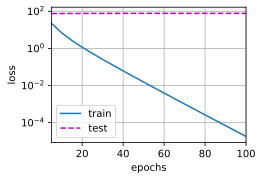

In [18]:
train(_lambda=0)

##### 考虑正则化

w的L2范数是： 3.7175755500793457


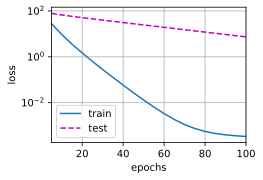

In [19]:
train(_lambda=1)

w的L2范数是： 0.3780292570590973


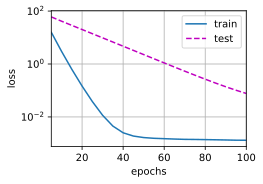

In [27]:
train(_lambda=3)

w的L2范数是： 0.013376601971685886


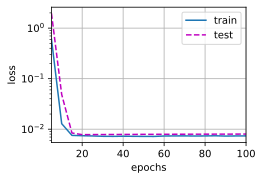

In [24]:
train(_lambda=30)